# The physical pendulum: air resistance
## Interpolation, Integration, approximation
Recall that the "large angle point pendulum" solution is determined, accurately, by the numerical solution we developed last time.  We will ignore niceties, and simply use the scipy.integrate module as our basic computational routine

Total Mass  0.02441547495810836
lcm  0.6311902802180227  l  0.639695
I, IMass, IString: 0.009813975740162914 0.009730557367544595 8.34183726183206e-05


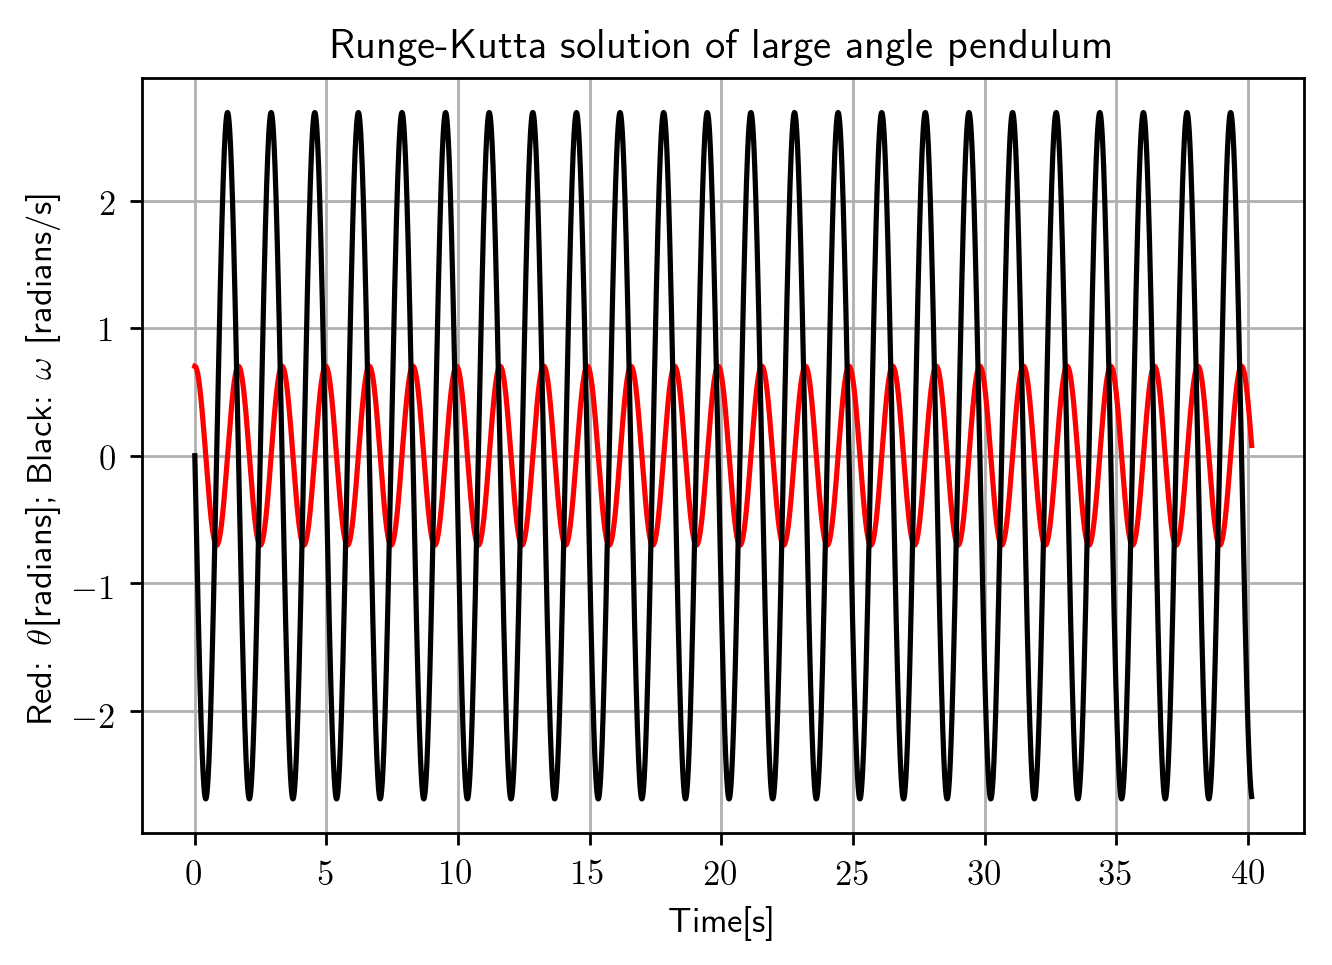

In [1]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)
import pendulumParameters as p

def pend(y,t):
    theta, omega = y
    dydt = np.array([omega, - g/l*np.sin(theta)])
    return dydt

#and now we set up some constants (measured quantities)
l=p.l # length of pendulum, meters
g=9.8 # acceleration of gravity on Earth's surface, meters/s**2
omega_0=np.sqrt(g/l)
T=2*np.pi/omega_0  #  period, seconds
theta_0=np.pi/6
theta_0=0.702 # for comparison to video

#use y0 for the initial conditions
y0 = np.array([theta_0, 0.0])
    
#    We generate a solution 1001 evenly spaced samples in the interval
#    0 <= `t` <= 10.  So our array of times is:

t = np.linspace(0, 25*T, 10001)
    
###    Call `odeint` to generate the solution.  To pass the parameters
#    `b` and `c` to `pend`, we give them to `odeint` using the `args`
#    argument.
    
solrk = odeint(pend, y0, t)

figure1=plt.figure()
plt.xlabel('Time[s]')
plt.ylabel(r'Red:  $\theta$[radians]; Black: $\omega$ [radians/s]')
plt.title('Runge-Kutta solution of large angle pendulum')
plt.plot(t, solrk[:, 0], 'r', label=r'rk $\theta(t)$')
plt.plot(t, solrk[:, 1], 'k', label=r'rk $\omega(t)$')
plt.grid()


Our next step is to add air resistance, as the next largest element in our numerical model.  For a sphere moving relatively slowly, this has been determined analytically (see, for instance, Landau and Lifshitz Fluid mechanics) with Stoke's formula for the drag force $\vec{F_d}=-6\pi\eta R\vec{v}$.
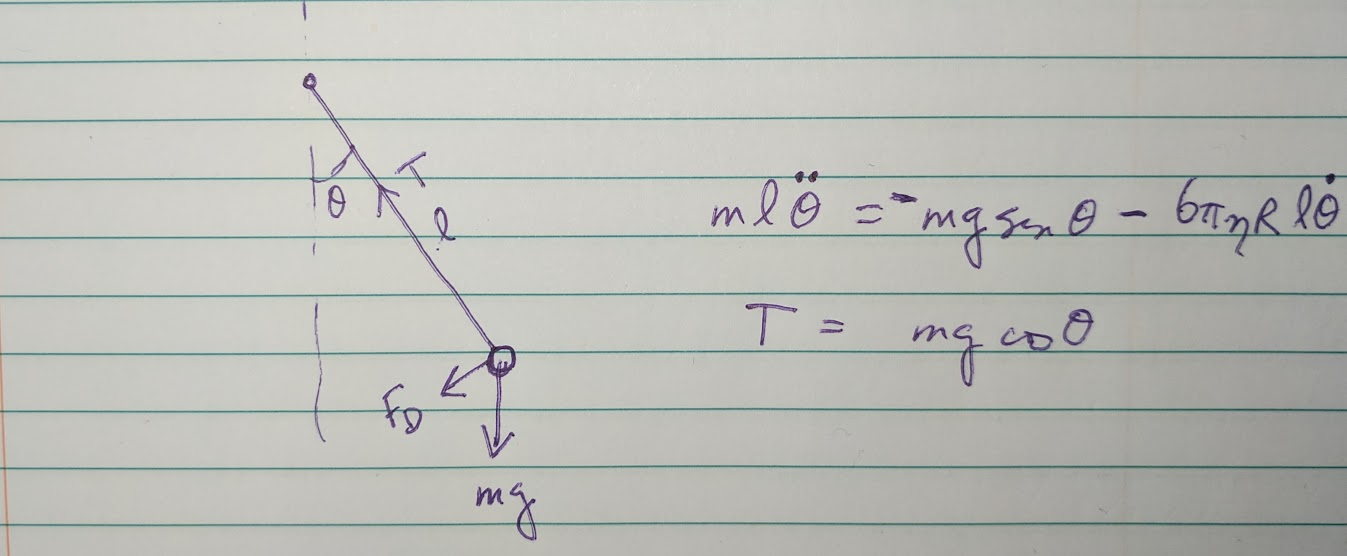

Our equation becomes 
\begin{equation}
\ddot\theta=-\frac{g}{l}\sin\theta-\frac{6\pi\eta R \dot{\theta}}{m}
\end{equation}

We look up the dynamic viscosity of air, $\eta=1.825 \times10^{-5}\rm{\ Pa\cdot s}$ and measure the radius of our pendulum bob, $R=1.27\rm{\ cm}.$  

To get a sense of the magnitudes, our peak velocity (for a pendulum of length 0.65 m) is about $1/2mv^{2}=mgh \Rightarrow v=\sqrt{2gh}\approx 3 \rm{\ m/s}$ and so the drag is about  $\vec{F_d}=-6\pi\eta R\vec{v}\approx 10^{-5}\rm{\ N}$.

# Add an explicit test of Energy conservation
We can solve the equation as it stands.  But for our energy conservation test, we no longer can use "The kinetic energy is constant" as a test.  Now we need to add in the energy lost to air resistance.  To do that we add a third variable, $E_d$, which is the energy lost to drag- which we can calculate by integrating:
\begin{equation}
\frac{dE_d}{dt}=F_d v= 6\pi\eta R l\dot{\theta}l\dot{\theta}=6\pi\eta R l^2\dot{\theta}^2
\end{equation}

We can do that by adding this equation for $E_d$ as a third member of our column vector.



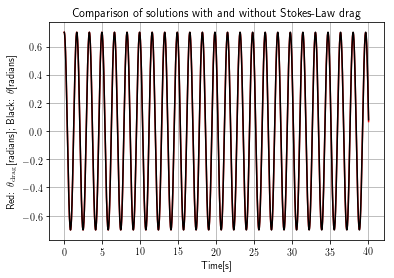

In [2]:
#Set up some constants (measured quantities)

l=p.l #length of pendulum, meters
g=9.8 # acceleration of gravity on Earth's surface, meters/s**2.  For now, we purposely leave this at lower accuracy.
omega_0=np.sqrt(g/l)
T=2*np.pi/omega_0  #  period, seconds
airViscosity=1.827e-5   #Pa-s  
mass=p.mMass #kg  mass of pendulum bob
radius=p.dMass/2 #m radius of pendulum bob
b=6*np.pi*airViscosity*radius

def pendulumWithDrag(y,t):
    theta, omega, Edrag = y
    dydt = np.array([omega, -g/l*np.sin(theta)-b*omega/mass, b*l**2*omega**2])
    return dydt

#use y0 for the initial conditions
y0 = np.array([theta_0, 0.0,0.0])
    
dragSolution = odeint(pendulumWithDrag, y0, t)

plt.figure()
plt.title('Runge-Kutta solution of large angle pendulum with drag')
plt.plot(t, dragSolution[:, 0], 'r', label='rk theta(t)')
plt.plot(t, solrk[:, 0], 'k', label='rk omega(t)')
plt.ylabel(r'Red: $\theta_{\rm{drag}}$[radians]; Black: $\theta$[radians]')
plt.xlabel('Time[s]')
plt.title('Comparison of solutions with and without Stokes-Law drag')
plt.grid()                     
                    

Figure 2 agrees to within line widths.  This is almost always the sign of not thinking about graphical representation- you want to present data in a way where there differences are amplified so it is possible to see them (and the uncertainties).  

Add (don't replace) another plot of the difference between the two solutions


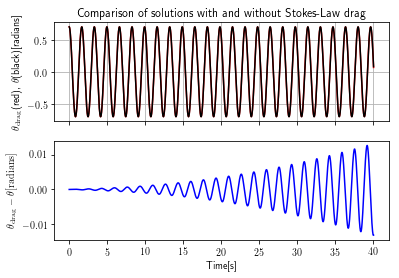

In [3]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('Comparison of solutions with and without Stokes-Law drag')
axarr[0].set_ylabel(r'$\theta_{\rm{drag}}$(red), $\theta$(black)[radians]')
axarr[0].plot(t, dragSolution[:, 0], 'r', label='rk theta(t)')
axarr[0].plot(t, solrk[:, 0], 'k', label='rk omega(t)')
axarr[0].grid()
axarr[1].set_xlabel('Time[s]')
axarr[1].set_ylabel(r'$\theta_{\rm{drag}}-\theta \rm{[radians]}$')
axarr[1].plot(t,dragSolution[:,0]-solrk[:,0], 'b');


And we plot the output of our third variable- the energy lost to drag.  

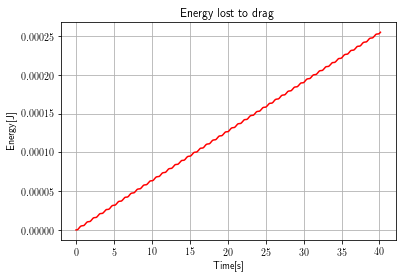

In [4]:
plt.title('Energy lost to drag')
plt.xlabel('Time[s]')
plt.ylabel('Energy[J]')
plt.plot(t, dragSolution[:, 2], 'r', label='E_drag')
plt.grid();

Energy is [0.03524732 0.03524732 0.03524732 ... 0.03499253 0.03499248 0.03499243]


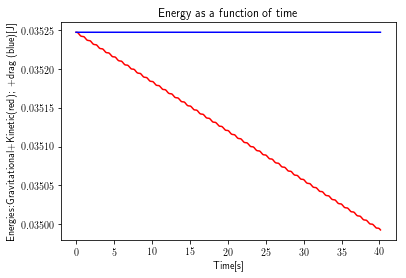

In [5]:
#notice- here we subtract off the potential energy of the mass if it were at rest
Energy=(0.5*mass*l**2)*dragSolution[:,1]**2-(mass*g*l)*(np.cos(dragSolution[:,0])-1)
fig=plt.figure()
plt.plot(t,Energy,'r')
plt.plot(t,Energy+dragSolution[:,2],'b')
plt.title('Energy as a function of time')
plt.xlabel('Time[s]')
plt.ylabel('Energies:Gravitational+Kinetic(red); +drag (blue)[J]')
print('Energy is', Energy)

This seems way too small- in 40 seconds we have lost less than 1% of the energy- so we would expect this pendulum to run for hours.   

An (obvious) danger of numerical solutions-- it becomes very easy to solve equations and so one might not always think through all the restrictions of the physical problem!

Our solution is bad because Stoke's law for viscosity only holds if the pendulum is moving slowly enough.  In reality it holds for small Reynold's numbers- less than a few hundred.  

We calculate Reynolds number:
\begin{equation}
R=\frac{\rho vl}{\eta}
\end{equation}

Here $\rho$ is the density of air.  Just to be careful we work it out for the pressure during our experiment- when our atmospheric pressure was 94.4 kPa compared to the standard atmosphere with pressure 101.325 kPa and density 1.225 kg/m3

l=Diameter=2*radius

In [6]:
airPressure=94.4 #kPa
standardAirDensity=1.225 # kg/m**3
standardAirPressure=101.325 #kPa
airDensity=airPressure/standardAirPressure*standardAirDensity

def ReynoldsNumber(velocity):
    '''Calculates Reynolds number for a pendulum of length l and angular velocity omega.  Because it is used 
    in an logarithmic interpolation, we impose 1 as a lower cutoff'''
    R=airDensity*velocity*radius*2/airViscosity
    return np.maximum(R,1)

print('Reynolds Number at ~maximum angular velocity=',ReynoldsNumber(2*l))


Reynolds Number at ~maximum angular velocity= 2029.1706683077578


Many fluid mechanics books give a plot of drag of a sphere as a function of Reynold's number.  I include such a plot below (from Munson, B. R., Young, D. F., and Okiishi, T. H., Fundamentals of Fluid Mechanics, Wiley, NY, 1990)
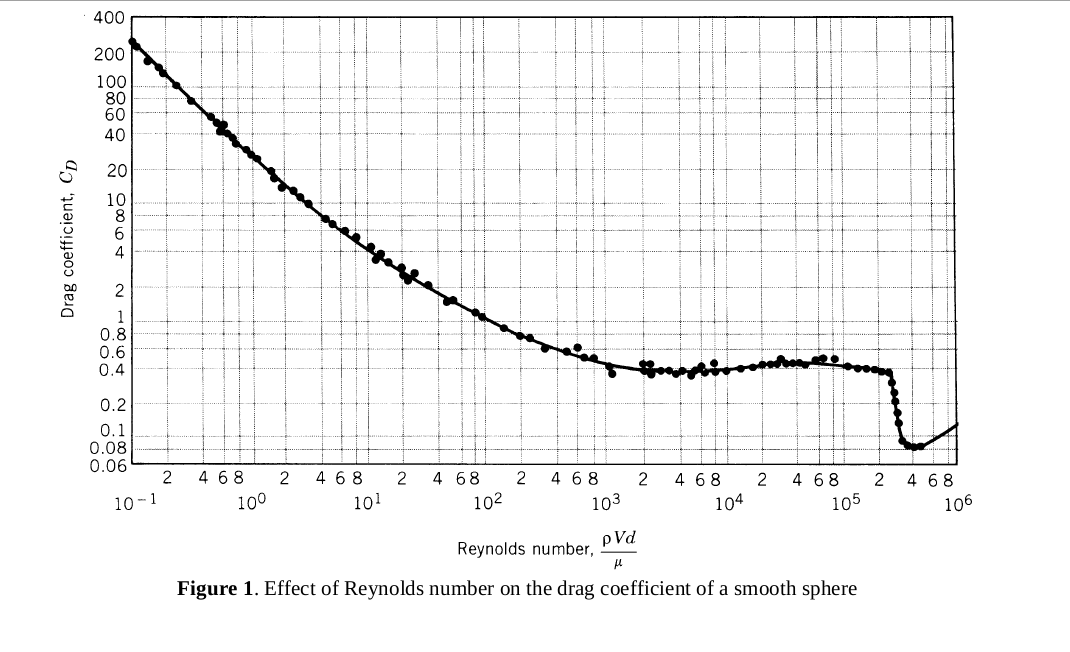

The part of this curve that is relevant is less than 4000.  There is no easy functional form, and so we are going to need to interpolate.  

We read off several points (this is easier than any other way to get the data)

|Reynolds Number|Drag Coefficient|
|---------------|----------------|
|1|24|
|4|8|
|10|4|
|40|1.7|
|100|1.1|
|400|0.6|
|1000|0.45|
|2000|0.4|
|4000|0.35|

In [7]:
ReynoldsNumber(.678*1.5)


1613.0082067774408

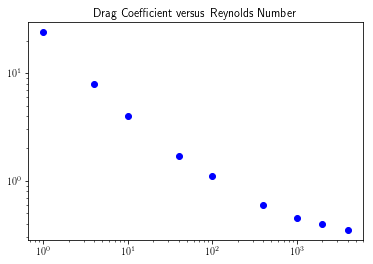

In [8]:
RN=np.array([1,4,10,40,100,400,1000,2000,4000])
DC=np.array([24,8,4,1.7,1.1,0.6,0.45,0.4,0.35])
plt.figure()
plt.title("Drag Coefficient versus Reynolds Number")
plt.loglog(RN,DC,'o',color='blue');

We are going to interpolate, but based on a logarithmic Reynolds number scale
The simplest interpolation is linear; ie.  $y(x)=(1-\alpha) y_1+ \alpha y_2$, where $\alpha=\frac{x-x_1}{x_2-x_1}$.

If one is worried about smoothness (and we typically are) a better choice is spline interpolation, or perhaps the use of polynomial interpolation.

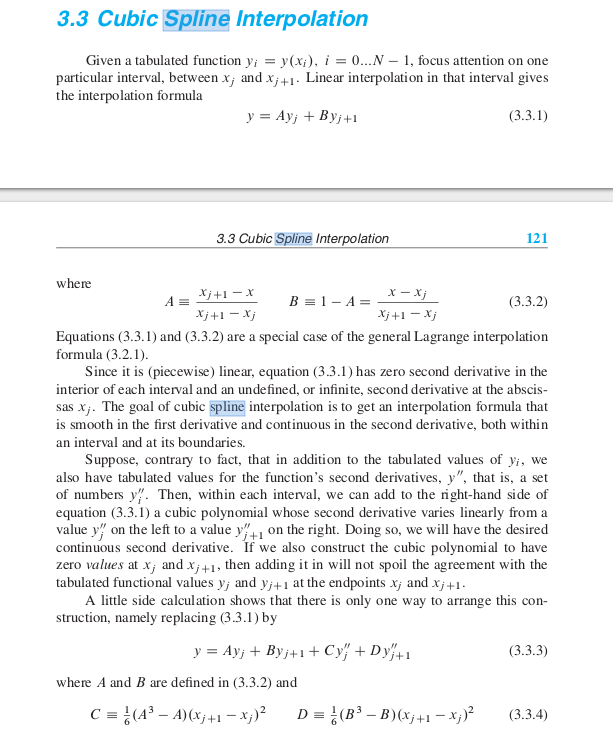

There are other interpolation schemes, which NR works through, but these will suffice for now.  (Chebyshev polynomials are particularly useful in some schemes where you want all the derivatives to be defined).

These interpolation schemes are built into scipy- so there is no work to use them!

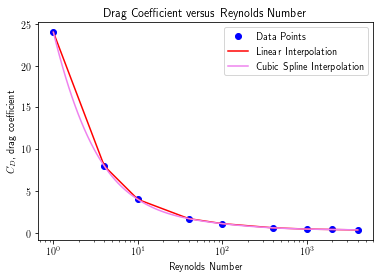

In [9]:
import scipy.interpolate
logRN=np.log(RN)  #interpolation in log ReynoldsNumber will be more sensible
plotX=np.logspace(np.log10(RN[0]),np.log10(RN[-1]),100)
linearInterpolation=scipy.interpolate.interp1d(logRN,DC) #out x-axis is log Reynold's Number
splineInterpolation=scipy.interpolate.interp1d(logRN,DC,kind='cubic')
def DragCoefficientLinear(reynoldsNumber): 
    return linearInterpolation(np.log(reynoldsNumber))
def DragCoefficientSpline(reynoldsNumber):
    return splineInterpolation(np.log(reynoldsNumber))

plt.figure()
plt.title("Drag Coefficient versus Reynolds Number")
plt.ylabel(r'$C_D$, drag coefficient')
plt.xlabel("Reynolds Number")
plt.semilogx(RN,DC,'o',color='blue',label='Data Points')
y0 = np.array([theta_0, 0.0])
plt.plot(plotX,DragCoefficientLinear(plotX),color='red',label="Linear Interpolation")
plt.plot(plotX,DragCoefficientSpline(plotX),color='violet',label="Cubic Spline Interpolation")
plt.legend();



We calculate the force at all velocities by knitting together Stoke's law and turbulent drag.  Turbulent drag, $F_t$, is
\begin{equation}
F_t=\frac{1}{2}\rho v^2AC_D
\end{equation}
where $A=\pi r^2$ is the cross sectional area of the sphere.

while viscous drag is $F_\eta=6\pi\eta r v.$  Reynolds number $R=\frac{\rho v 2r}{\eta}$ can be used instead of $\eta$ in Stoke's law:
\begin{equation}
F_\eta=6\pi r^2 v^2 \frac{2r}{R}=\frac{24}{R}F_t
\end{equation}

The drag coefficient at $R=1$ is 24, so the drag is purely viscous as we expect.  
Our function for the drag force will be viscous drag at low velocities, and turbulent drag at high.  


In [10]:
area=np.pi*radius**2
velocityAtR1=airViscosity/(2*airDensity*radius)
ceta= 6*np.pi*airViscosity*radius
ct=.5*airDensity*area
def fdrag(velocity):
    v=abs(velocity)
    if v<velocityAtR1:
        force=ceta*v
    else:
        force=ct*v**2*DragCoefficientSpline(ReynoldsNumber(v))
    return force

drag=np.vectorize(fdrag)  #so that drag can accept either a scalar or an array
print(drag([0,1,2]))

[0.         0.00011956 0.00042804]


[4.70135622e-08 1.18243614e-07 2.09983961e-07 3.20803091e-07
 4.48342124e-07 5.91304805e-07 7.48744880e-07 9.19739290e-07
 1.10336665e-06 1.29870063e-06 1.50493990e-06 1.72162549e-06
 1.94840677e-06 2.18498643e-06 2.43111037e-06 2.68656000e-06
 2.95114632e-06 3.22470516e-06 3.50709347e-06 3.79818624e-06
 4.09787405e-06 4.40606099e-06 4.72266294e-06 5.04760613e-06
 5.38082593e-06 5.72226577e-06 6.07187630e-06 6.42961456e-06
 6.79544334e-06 7.16933061e-06 7.55124896e-06 7.94117522e-06
 8.33908997e-06 8.74497730e-06 9.15882439e-06 9.58062131e-06
 1.00103607e-05 1.04480377e-05 1.08936495e-05 1.13471951e-05
 1.18086724e-05 1.22780794e-05 1.27554150e-05 1.32406797e-05
 1.37338750e-05 1.42350036e-05 1.47440688e-05 1.52610753e-05
 1.57860281e-05 1.63189333e-05 1.68597976e-05 1.74086283e-05
 1.79654335e-05 1.85302215e-05 1.91030014e-05 1.96837826e-05
 2.02725752e-05 2.08693894e-05 2.14742358e-05 2.20871256e-05
 2.27080702e-05 2.33370811e-05 2.39741702e-05 2.46193499e-05
 2.52726325e-05 2.593403

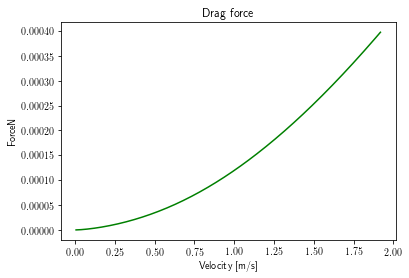

In [11]:

plt.figure()
xomega=np.linspace(0,l*3,300)
print (drag(xomega[1:299]))
plt.plot(xomega[1:],drag(xomega[1:]),color='green')
plt.title("Drag force")
plt.xlabel('Velocity [m/s]')
plt.ylabel('Force{N}')
plt.show()

Now we can go back and redo the pendulum with the improved drag. 

The pendulum equation is 
$\tau=I\ddot{\theta}=-mgl_{\rm{cm}}\sin\theta-F_Dl\dot{\theta}$
so we end up with 
$$\begin{pmatrix}
\frac{d\theta}{dt}\\
\frac{d\omega}{dt}\\
\frac{dE}{dt}
\end{pmatrix}=\begin{pmatrix} \omega \\
-\frac{mgl_{cm}}{I}\sin{\theta}-\frac{F_Dl\omega}{I}\\
l\omega F_D
\end{pmatrix}
$$

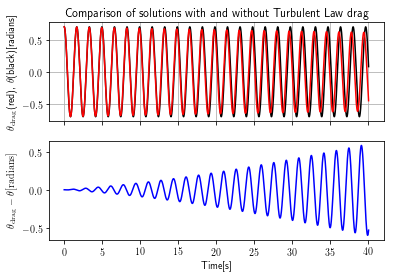

In [12]:
import pendulumParameters as p
def pendulumWithTurbulentDrag(y,t):
    theta, omega,energy = y
    dydt = np.array([omega, - p.m*g*p.lcm/p.I*np.sin(theta)-drag(p.l*omega)/(p.m*p.l)*np.sign(omega),drag(p.l*omega)*p.l*np.abs(omega)])
    return dydt
#use y0 for the initial conditions
y0 = np.array([theta_0, 0.0,0.0])
                     
dragSolutionWithTurbulence = odeint(pendulumWithTurbulentDrag, y0, t)

f, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('Comparison of solutions with and without Turbulent Law drag')
axarr[0].set_ylabel(r'$\theta_{\rm{drag}}$(red), $\theta$(black)[radians]')
axarr[0].plot(t, solrk[:, 0], 'k', label='rk omega(t)')
axarr[0].plot(t, dragSolutionWithTurbulence[:, 0], 'r', label='rk theta(t)')
axarr[0].grid()
axarr[1].set_xlabel('Time[s]')
axarr[1].set_ylabel(r'$\theta_{\rm{drag}}-\theta \rm{[radians]}$')
axarr[1].plot(t,dragSolutionWithTurbulence[:,0]-solrk[:,0], 'b');


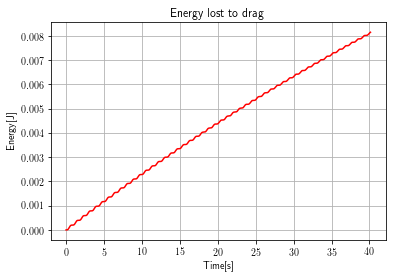

In [13]:
plt.title('Energy lost to drag')
plt.xlabel('Time[s]')
plt.ylabel('Energy[J]')
plt.plot(t, dragSolutionWithTurbulence[:, 2], 'r', label='E_drag')
plt.grid();


Energy is [0.03570975 0.03570975 0.03570975 ... 0.0277063  0.02770576 0.02770524]


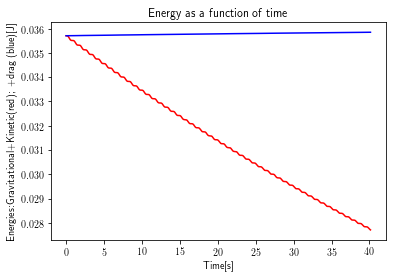

In [14]:
#notice- here we subtract off the potential energy of the mass if it were at rest
Energy=0.5*p.I*dragSolutionWithTurbulence[:,1]**2-(p.m*g*p.lcm)*(np.cos(dragSolutionWithTurbulence[:,0])-1)
fig=plt.figure()
plt.plot(t,Energy,'r')
plt.plot(t,Energy+dragSolutionWithTurbulence[:,2],'b')
plt.title('Energy as a function of time')
plt.xlabel('Time[s]')
plt.ylabel('Energies:Gravitational+Kinetic(red); +drag (blue)[J]')
print('Energy is', Energy)

# Air resistance of the string
At this point it is straightforward.  We will do is work it through at a level with which we can determine the size of the systematic uncertainty; and then later we will fit for the overall air resistance in an experiment as a free parameter.

The drag coefficient can be again found in tables- see, for instance, Mark's Engineering Handbook:
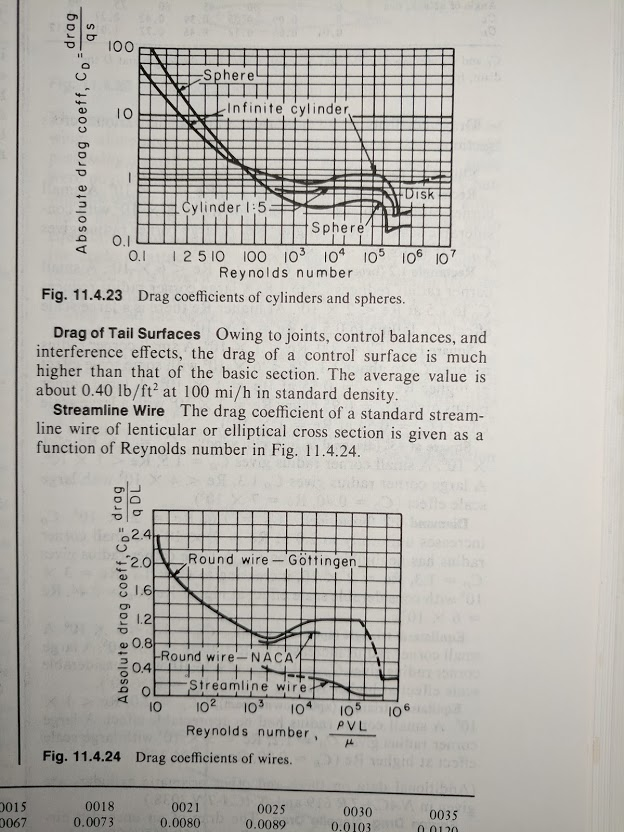  _
We see that the general magnitude  of drag is roughly the same for a cylinder as for a sphere, but the minimum value for a wire is roughly twice that for a sphere--the minimum value is 0.9 at about R=1000, compared to 0.4 for a sphere.  

We will estimate the ratio of wire drag to sphere drag. 
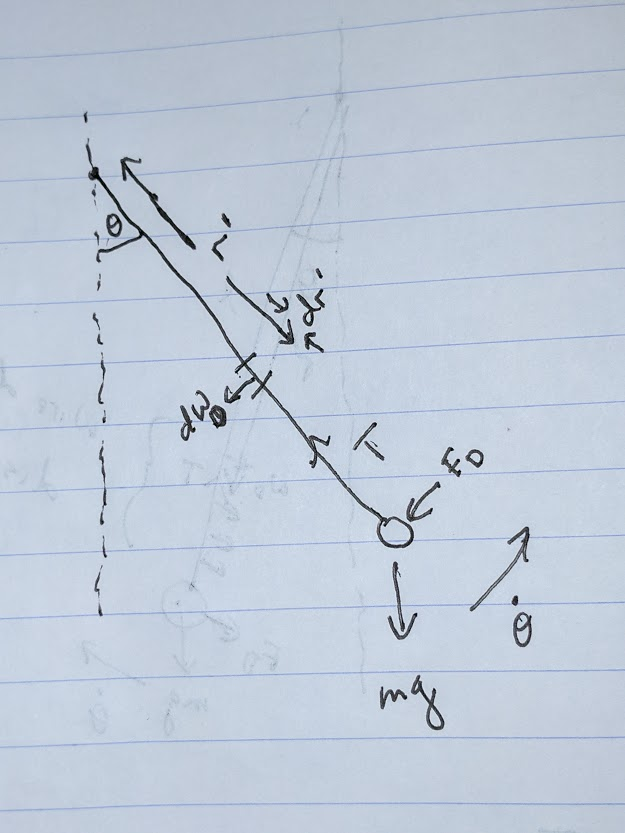_

The wire drag, $W_d$ provides an additional torque- at a distance $r'$ from the pivot the wire drag is $dW_d$.  Then the additional torque about the pivot on the wire is $\tau_d=\int_{0}^{l}r'dW_{d}$.  The infinitesimal drag is exactly the same form as the drag on the sphere:
\begin{equation} dW_d=\frac{1}{2}\rho v^2 A C_d=\frac{1}{2}\rho\omega^2 r'^2 Ddr' C_d \end{equation}
\begin{equation}\tau_d= \frac{ D\omega^2\rho}{2}\int_{0}^{l} C_d(r'\omega)r'^3 dr'\approx  \frac{ D\omega^2\rho l^4}{8}<C_d>  \end{equation}
where $D$ is the diameter of the wire.  The torque from air resistance on the sphere is $\frac{\rho l^3 \omega^2 \pi r^2 C_{d,s}}{2}$ and so the ratio of torques is $\frac{D l <C_d>}{4 \pi r^2 C_{d,s}}$.  Plugging in the numbers we get




In [15]:
wireDiameter=p.stringDiameter #wire diameter, m
ratioWireToSphere=wireDiameter*p.l/(np.pi*p.dMass**2)*2  #the final 2 is the assumption of the ratio of drag coefficients
print(ratioWireToSphere)

0.4974198221229047


Thus, we see that ignoring the air resistance of the wire leads to about a significant underestimate of the drag torque.  There are different levels at which we can approach this- 
1.  Leave it out completely and include a large systematic uncertainty in the drag.  Notice that isn't too terrible as far as the period is concerned- the sphere drag has an influence on the period of 1/4 cycle in 22 cycles or about 1%.  Ignoring the wire will mean we underestimate the damping and make a small mistake in the period-roughly by half of this.  
2.  We can add a correction- that is, simply multiply our spherical drag force by 1.49.  Then our systematic uncertainty becomes the uncertainty in our calculation of the correction- basically the uncertainty in the wire diameter or the Drag ratios.
3.  We can precisely calculate the drag torque- it is just to integrate the equation we have already written down, making a new interpolation table and a new function.  
4.  We can "fit"- ie. find the value of the factor in (2) that best fits the data.

In most real applications I would probably do (2).  But since we are using this as an example of ways to use numerical techniques, doing (3), and then (4) exposes us to several new numerical algorithms.  Because this is in a course, we will pursue a more precise calculation,and then fitting an overall factor later on.  

Following the development we did for the sphere, we read numbers from figure 11.4.24.  Note that we don't have a simple "Stoke's formula" for the wire, but we will extrapolate the force so that it goes linearly from zero to the first point on our plot.  But that is later.  

We start with our interpolation:


wireData: [[2.000e+01 1.880e+00]
 [5.000e+01 1.570e+00]
 [1.000e+02 1.390e+00]
 [2.000e+02 1.250e+00]
 [5.000e+02 1.100e+00]
 [1.000e+03 9.720e-01]
 [2.000e+03 8.760e-01]
 [5.000e+03 9.720e-01]
 [1.000e+04 1.092e+00]
 [2.000e+04 1.164e+00]
 [5.000e+04 1.178e+00]
 [1.000e+05 1.164e+00]]


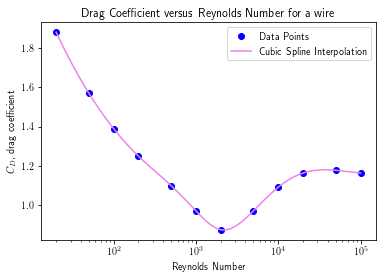

In [16]:
wireData=np.array([20,1.88,50,1.57,100,1.39,200,1.25,500,1.10,1000,.972,2000,.876,5000,.972,10000,1.092,20000,1.164,50000,1.178,100000,1.164]).reshape(12,2)
print('wireData:',wireData)

logWireData=np.log(wireData[:,0])  #interpolation in log ReynoldsNumber will be more sensible
plotXWire=np.logspace(np.log10(wireData[0,0]),np.log10(wireData[-1,0]),100)
interpolation=scipy.interpolate.interp1d(logWireData,wireData[:,1],kind='cubic')
def DragWire(reynoldsNumber):
    return interpolation(np.log(reynoldsNumber))

plt.figure()
plt.title("Drag Coefficient versus Reynolds Number for a wire")
plt.ylabel(r'$C_D$, drag coefficient')
plt.xlabel("Reynolds Number")
plt.semilogx(wireData[:,0],wireData[:,1],'o',color='blue',label='Data Points')
plt.plot(plotXWire,DragWire(plotXWire),color='violet',label="Cubic Spline Interpolation")
plt.legend();


The next step is to find the $dF_w(v)$- the force on an element of wire of length $dr'$ and radius r (remember the sphere radius r is different!) moving at velocity $v$.  We know 
\begin{equation} dF_w(v)=C_D(R) \frac{\rho v^2 2r dz}{2}=C_D(\rho v 2r/\eta) \rho v^2 r dz \end{equation}
for the "fast velocities" (ie. those with Reynolds Number >20).  For slower velocities we will do:
\begin{equation} dF_w(v)=\frac{C_D(20)\rho v_{20}^2}{2v_{20}}v2rdz  \end{equation} where $v_{20}$ is the velocity that corresponds to a Reynolds Number of 20.  This gives us viscous (proportional to velocity) behaviour and extrapolates into the turbulent flow readily.


The velocity at which Reynolds Number =20 is 0.40661337678607556  m/s


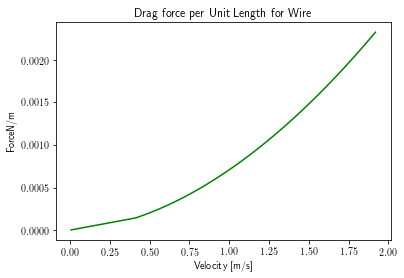

In [17]:
v20=20*airViscosity/(wireDiameter*airDensity)
v20_Coefficient=DragWire(20)*airDensity*v20*wireDiameter/2
print('The velocity at which Reynolds Number =20 is',v20, ' m/s')

def dWireForce_Scalar(velocity):
    v=abs(velocity)  #we make all velocities positive for this calculation and always return a positive force.  
    if(v<v20):
        dforce=v20_Coefficient*v
    else:
        reynoldsNumber=airDensity*v*wireDiameter/airViscosity
        dforce=DragWire(reynoldsNumber)*airDensity*v**2*wireDiameter/2  #units are N/m since we put dz=1
    return dforce

dWireForce=np.vectorize(dWireForce_Scalar)
plt.figure()
plt.plot(xomega[1:],dWireForce(xomega[1:]),color='green')
plt.title("Drag force per Unit Length for Wire")
plt.xlabel('Velocity [m/s]')
plt.ylabel('Force{N/m}')
plt.show()

# Numerical Integration (also called Quadrature)

The techniques for numerical integration are laid out in  for numerical integration are laid out in Chapter 4 of Numerical Recipes.  The issues here are the same as in solving ODE's- in fact, we can just integrate a function by making it into an ODE.  But this area developed separately and there are a few points to bring out.  Just like in ODE's by thinking through the mathematics we can get "higher order" evaluation of derivatives; using the Taylor expansion to work them into an approximation of the function, and integrate with more and more precision.  

There are two general types of integration- fixed intervals, and variable integrals, where we are free to pick the places where the function is evaluated.  This generally allows you (for well behaved functions) better precision for fewer function calls.  

We will look at a few cases and see if there are differences in efficiency/output for our simple integration.  

Our function is pretty smooth- and we don't know the right answer when we integrate.  As an aside we will look at a function we do know how to integrate- say
\begin{equation}\int_0^{47\pi}sin(x)dx =-cos(47\pi)+cos(0)=2\end{equation}

We start with the function evaluated at fixed points.
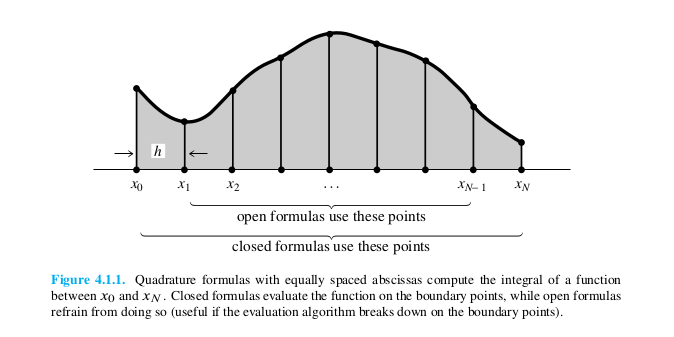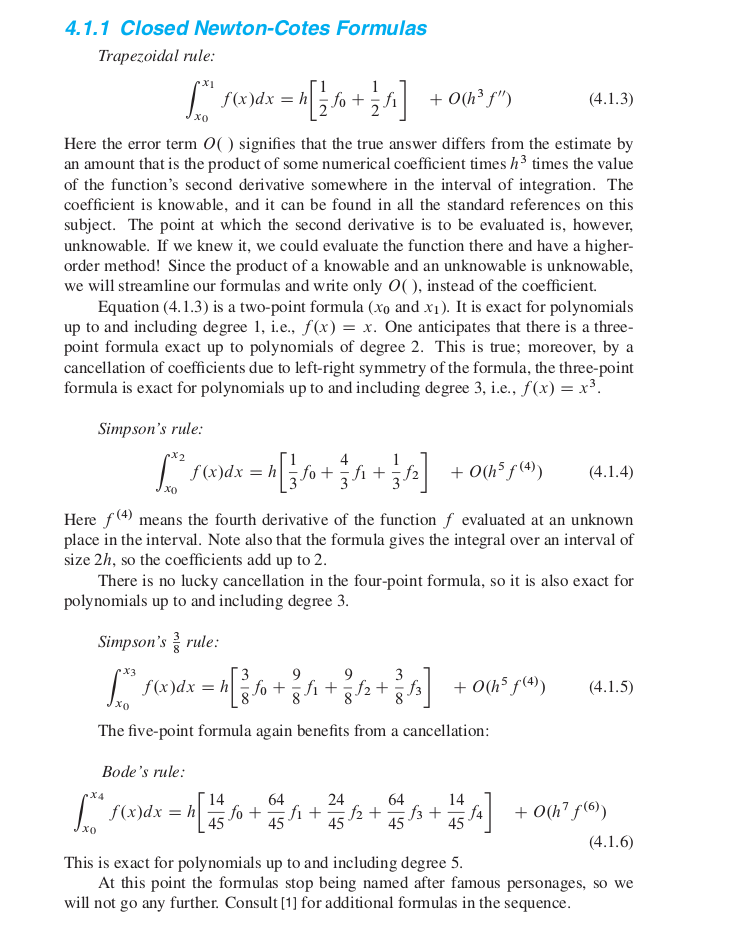
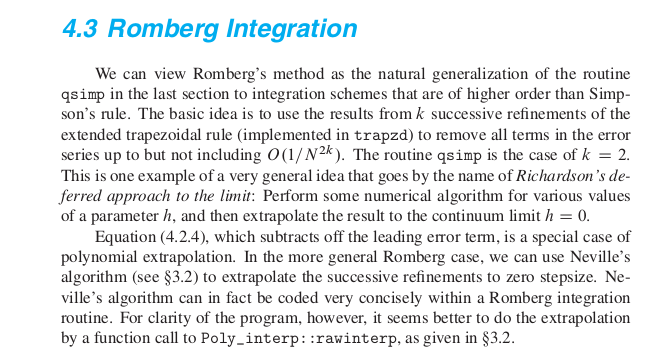

In [18]:
a2=np.linspace(0,47*np.pi,100)
a3=np.linspace(0,47*np.pi,1000)
a4=np.linspace(0,47*np.pi,10000)
a6=np.linspace(0,47*np.pi,1000000)
s2=np.sin(a2)
s3=np.sin(a3)
s4=np.sin(a4)
s6=np.sin(a6)

#"dumb" integration- just add the values *dx
print('100 steps ',np.sum(s2[:-1])*47*np.pi/100)
print('1000 steps ',np.sum(s3[:-1])*47*np.pi/1000)
print('10000 steps ',np.sum(s4[:-1])*47*np.pi/10000)
print('1000000 steps ',np.sum(s6[:-1])*47*np.pi/1000000)
print(s2[:-2])

100 steps  1.59859288864521
1000 steps  1.9943613783434768
10000 steps  1.9997636596403652
1000000 steps  1.9999979963663368
[ 0.          0.99685478  0.1580014  -0.97181157 -0.31203345  0.92235429
  0.45822652 -0.84972543 -0.59290793  0.75574957  0.71269417 -0.64278761
 -0.81457595  0.51367739  0.89599377 -0.37166246 -0.95490224  0.22031053
  0.98982144 -0.06342392 -0.99987413 -0.09505604  0.98480775  0.25114799
 -0.94500082 -0.40093054  0.88145336  0.54064082 -0.79576184 -0.666769
  0.69007901  0.77614646 -0.56705986 -0.8660254   0.42979491  0.93414786
 -0.28173256 -0.97880245  0.12659245  0.99886734  0.03172793 -0.99383846
 -0.18925124  0.96384216  0.34202014 -0.909632   -0.48619674  0.83256985
  0.61815899 -0.73459171 -0.73459171  0.61815899  0.83256985 -0.48619674
 -0.909632    0.34202014  0.96384216 -0.18925124 -0.99383846  0.03172793
  0.99886734  0.12659245 -0.97880245 -0.28173256  0.93414786  0.42979491
 -0.8660254  -0.56705986  0.77614646  0.69007901 -0.666769   -0.79576184
 

In [19]:
#trapezoidal rule
from scipy.integrate import trapz
print('100 steps ',trapz(s2,x=a2))
print('1000 steps ',trapz(s3,x=a3))
print('10000 steps ',trapz(s4,x=a4))

100 steps  1.6147402915607854
1000 steps  1.9963577360795541
10000 steps  1.9999636560059666


In [20]:
#simpsons rule
from scipy.integrate import simps
print('100 steps ',simps(s2,x=a2))
print('1000 steps ',simps(s3,x=a3))
print('10000 steps ',simps(s4,x=a4))

100 steps  1.8625356570807217
1000 steps  1.9999854317131587
10000 steps  1.9999999985470491


In [21]:
#romberg-- here we need 2**n+1 steps
r2=np.linspace(0,47*np.pi,65)
r3=np.linspace(0,47*np.pi,257)
r4=np.linspace(0,47*np.pi,1025)
from scipy.integrate import romb
print('65 steps ',romb(np.sin(r2),dx=r2[1]))
print('257 steps ',romb(np.sin(r3),dx=r3[1]))
print('1025 steps ',romb(np.sin(r4),dx=r4[1]))

65 steps  3.5855281587548755
257 steps  2.0004731482753195
1025 steps  2.0000000005272285


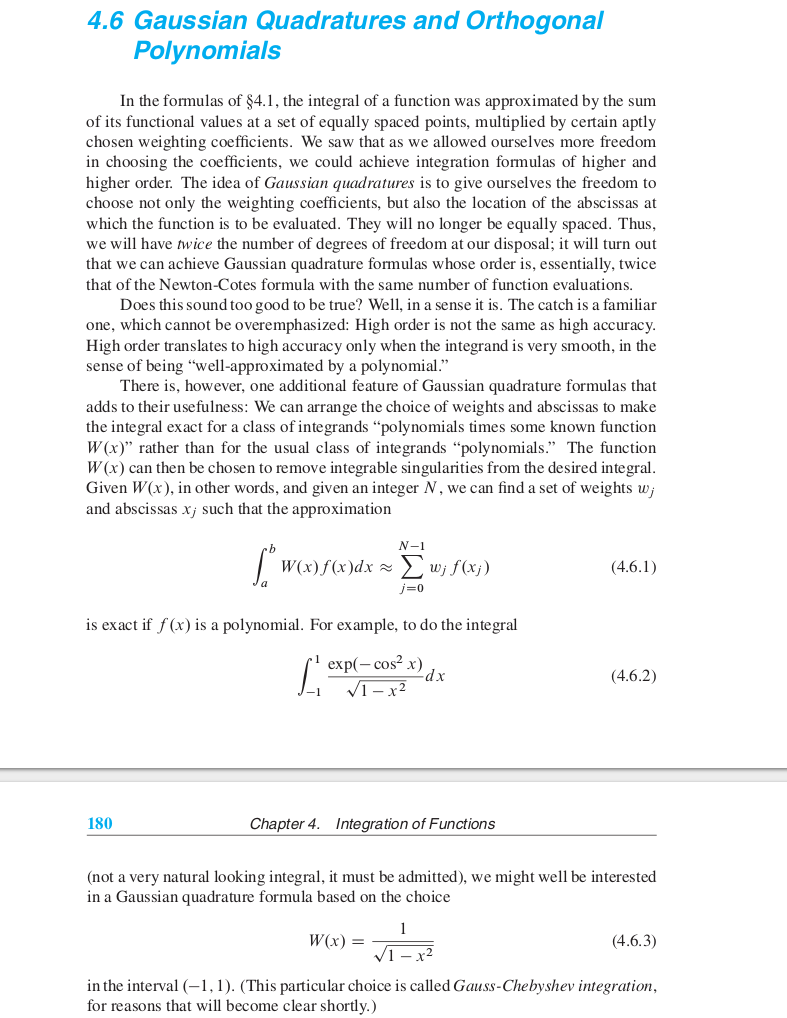


In [22]:
from scipy.integrate import quadrature

#we define our own function so we can keep track of the number of evaluations.
iter=0
def sine(x):
    global iter
    iter+=1
    return np.sin(x)
 
print ('quadrature=',quadrature(sine,0,47*np.pi,maxiter=1000),'number of iterations',iter)


quadrature= (1.9999999991400326, 6.635991534054142e-09) number of iterations 55


# Torque due to the air drag on the wire.
We use this  integration to develop the function Torque(omega) which is the integrated torque over the pendulum from the pivot to the ball.  

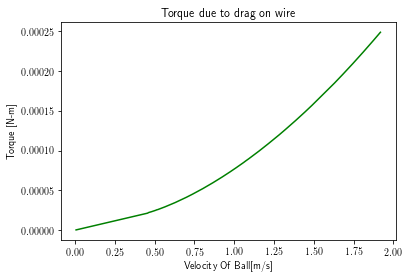

In [23]:
import scipy.integrate

def dTorque(rPrime,omega):
    '''Calculates the torque from an element of wire at rprime moving with angular velocity omega'''
    return rPrime*dWireForce(rPrime*omega)
vdTorque=np.vectorize(dTorque)

def wireTorque(anOmega):
    om=np.abs(anOmega)
    if(np.isscalar(om)):
        return quadrature(dTorque,0,l,args=om)
    else:
        retval=np.zeros_like(om)
        for i in np.arange(0,om.size):
            retval[i]=quadrature(vdTorque,0,l,args=om[i])[0]
        return retval
plt.figure()
plt.plot(xomega[1:],wireTorque(xomega[1:]/l),color='green')
plt.title("Torque due to drag on wire")
plt.xlabel('Velocity Of Ball[m/s]')
plt.ylabel('Torque [N-m]');

# Evaluating Functions

At this point we could proceed and do the differential equation.  But if we think about it, the evaluation of wireTorque is quite complicated- for each omega it involves integrating a function that calls several other functions.  In this situation, we are often better to _approximate_ the function using interpolation techniques.  We already looked at _spline_ interpolation and linear interpolation, which work well when we have tabulated values.  We can do much better, though, if we use techniques that are designed to interpolate and are free to evaluate the function at any point.  

We proceed by the use of _Chebyshev Polynomials_
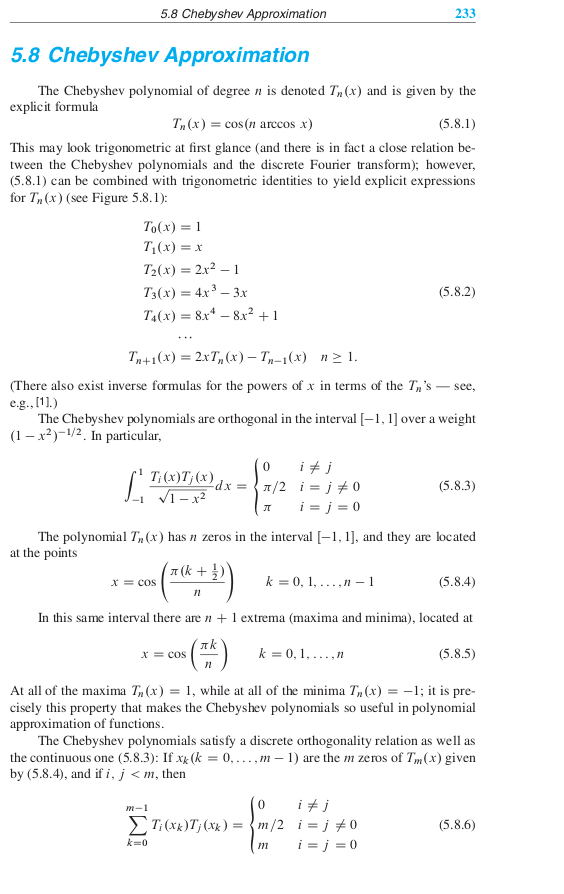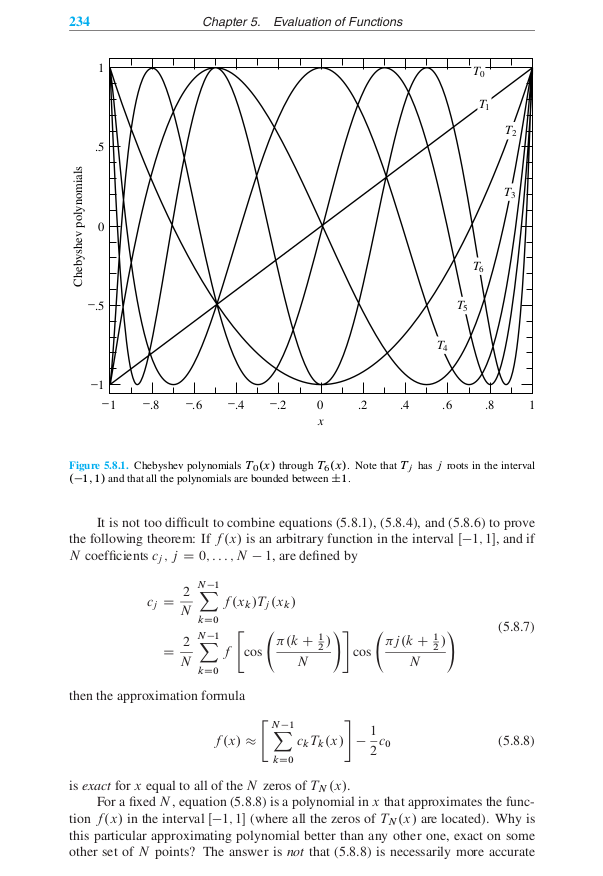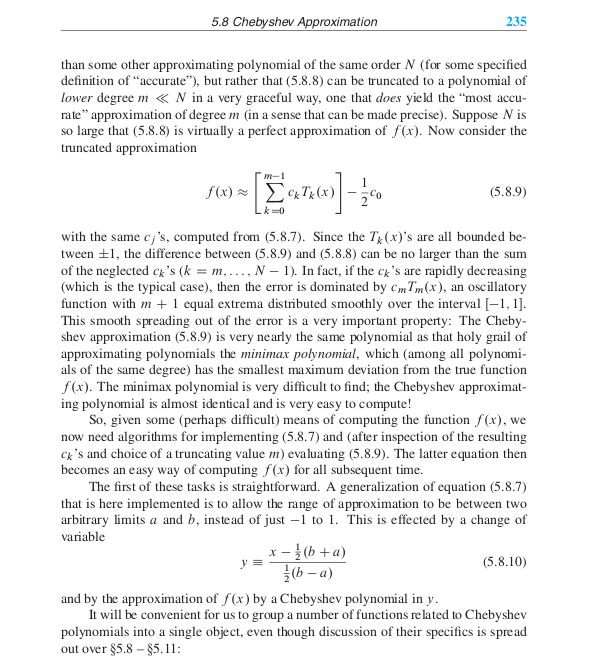


Somewhat peculiarly, Scipy has routines to calculate the chebyshev polynomials, but not explicitly evaluate polynomials based on NR 5.8.7.  (They do have ways to generate a fit to data- but that is quite different.  Why?)

So we (re)write this simple routine in Python.

In [24]:
def ChebyshevCoefficients(func,a,b,n):
    '''Evaluate n chebyshev coefficients for func evaluated between a and b;  based on NR 5.8.7'''
    range=0.5*(b-a)  
    average=0.5*(b+a)
    x=range*np.cos((np.arange(0,n)+0.5)*np.pi/n)+average  #maps from -1 to 1 onto a-b
    v=func(x).reshape(1,n)  #row array of function values
    A=np.cos(np.pi/n*np.arange(0,n)*((np.arange(0,n)+0.5)).reshape(n,1))
    C=np.dot(v,A)*2/n 
    return C
    
    
def ChebEval(x,c,a,b):
    '''Evaluate a chebyshev series c(x), for the range a-b'''
    range=0.5*(b-a)
    average=0.5*(a+b)
    mapped=(x-average)/range
    return np.polynomial.chebyshev.chebval(mapped,c)-c[0]/2
    
    
    

Now set up a couple of test cases- lets pick sin(x)/x and a triangle wave between 0 and 1.  The latter is a little perverse- because it doesn't have continuous derivatives and therefore isn't really described by a polynomial.

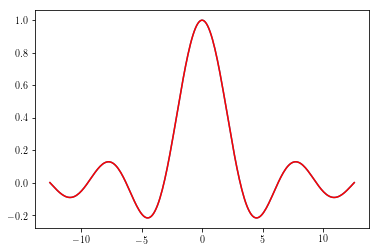

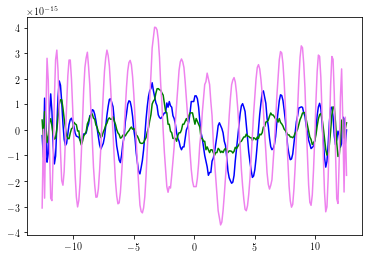

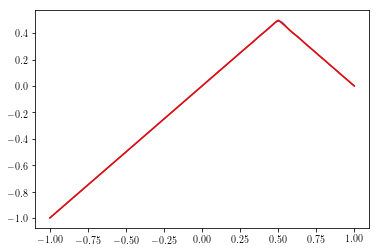

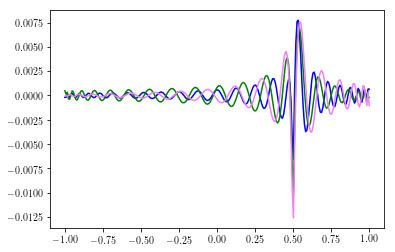

In [25]:
def sinc(x):
    return np.where(x==0,1,np.sin(x)/x)

def triangle(x):
    return np.where(x<.5,x,1-x)

ar=np.linspace(-4*np.pi,4*np.pi,250)
ChebyshevCoefficientsForSinc=ChebyshevCoefficients(sinc,ar[0],ar[-1],50).reshape(50,)
y50=ChebEval(ar,ChebyshevCoefficientsForSinc,ar[0],ar[-1])
y40=ChebEval(ar,ChebyshevCoefficientsForSinc[:40],ar[0],ar[-1])
y30=ChebEval(ar,ChebyshevCoefficientsForSinc[:30],ar[0],ar[-1])
y20=ChebEval(ar,ChebyshevCoefficientsForSinc[:20],ar[0],ar[-1])
y35=ChebEval(ar,ChebyshevCoefficientsForSinc[:35],ar[0],ar[-1])
#y=np.polynomial.chebyshev.chebval(ar,ar2)
plt.figure()
plt.plot(ar,y35);
plt.plot(ar,sinc(ar),'r')
plt.figure()
plt.plot(ar,y50-sinc(ar),'b')
plt.plot(ar,y40-sinc(ar),'g')
#plt.plot(ar,y30-sinc(ar),'k')
#plt.plot(ar,y20-sinc(ar),'r')
plt.plot(ar,y35-sinc(ar),color='violet');

ar2=np.linspace(-1,1,250)
ChebyshevCoefficientsForTriangle=ChebyshevCoefficients(triangle,ar2[0],ar2[-1],50).reshape(50,)
yy50=ChebEval(ar2,ChebyshevCoefficientsForTriangle,ar2[0],ar2[-1])
yy40=ChebEval(ar2,ChebyshevCoefficientsForTriangle[:40],ar2[0],ar2[-1])
yy30=ChebEval(ar2,ChebyshevCoefficientsForTriangle[:30],ar2[0],ar2[-1])
yy20=ChebEval(ar2,ChebyshevCoefficientsForTriangle[:20],ar2[0],ar2[-1])
yy35=ChebEval(ar2,ChebyshevCoefficientsForTriangle[:35],ar2[0],ar2[-1])
#y=np.polynomial.chebyshev.chebval(ar,ar2)
plt.figure()
plt.plot(ar2,yy50);
plt.plot(ar2,triangle(ar2),'r')
plt.figure()
plt.plot(ar2,yy50-triangle(ar2),'b')
plt.plot(ar2,yy40-triangle(ar2),'g')
#plt.plot(ar2,yy30-triangle(ar2),'k')
#plt.plot(ar2,yy20-triangle(ar2),'r')
plt.plot(ar2,yy35-triangle(ar2),color='violet');

                                                           

# Interpolating our Wire Torque Function
We do this in exactly the same way- ending up with a _fast_ functional evaluation that essentially retains the original precision. 



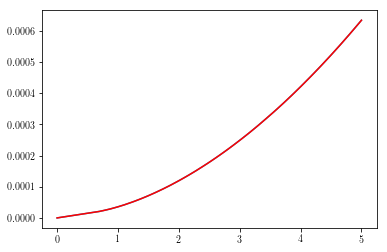

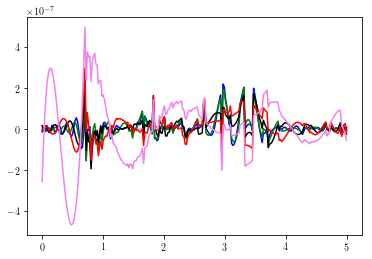

In [26]:
omegaArray=np.linspace(0,5,250)
ChebyshevCoefficientsForWireTorque=ChebyshevCoefficients(wireTorque,omegaArray[0],omegaArray[-1],60).reshape(60,)
y60=ChebEval(omegaArray,ChebyshevCoefficientsForWireTorque,omegaArray[0],omegaArray[-1])
y50=ChebEval(omegaArray,ChebyshevCoefficientsForWireTorque[:50],omegaArray[0],omegaArray[-1])
y40=ChebEval(omegaArray,ChebyshevCoefficientsForWireTorque[:40],omegaArray[0],omegaArray[-1])
y30=ChebEval(omegaArray,ChebyshevCoefficientsForWireTorque[:30],omegaArray[0],omegaArray[-1])
y20=ChebEval(omegaArray,ChebyshevCoefficientsForWireTorque[:20],omegaArray[0],omegaArray[-1])
y10=ChebEval(omegaArray,ChebyshevCoefficientsForWireTorque[:10],omegaArray[0],omegaArray[-1])

#y=np.polynomial.chebyshev.chebval(omegaArray,omegaArray2)
plt.figure()
plt.plot(omegaArray,y60);
plt.plot(omegaArray,wireTorque(omegaArray),'r')
plt.figure()
plt.plot(omegaArray,y60-wireTorque(omegaArray),'b')
plt.plot(omegaArray,y50-wireTorque(omegaArray),'g')
plt.plot(omegaArray,y30-wireTorque(omegaArray),'k')
plt.plot(omegaArray,y20-wireTorque(omegaArray),'r')
plt.plot(omegaArray,y10-wireTorque(omegaArray),color='violet');



Can we explain what is happening?

We use y10- which is more precise that we actually need.  

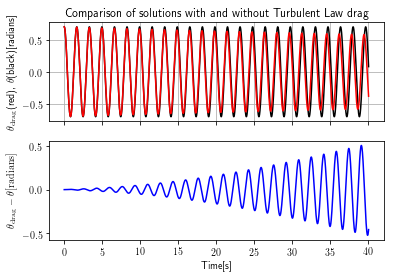

In [27]:
def wireTorqueCheb(x):
    return ChebEval(np.abs(x),ChebyshevCoefficientsForWireTorque[:10],omegaArray[0],omegaArray[-1])

def pendulumWithTurbulentDragAndString(y,t):
    theta, omega,energy = y
    dydt = np.array([omega, 
                     - g/l*np.sin(theta)-(drag(l*omega)/(mass*l)
                      +wireTorqueCheb(l*omega)/(mass*l**2))*np.sign(omega),
                     (drag(l*omega)*l+wireTorqueCheb(l*omega))*np.abs(omega)])
    return dydt
#use y0 for the initial conditions
y0 = np.array([theta_0, 0.0,0.0])
                     
dragSolutionWithTurbulenceAndString = odeint(pendulumWithTurbulentDragAndString, y0, t)

f, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('Comparison of solutions with and without Turbulent Law drag')
axarr[0].set_ylabel(r'$\theta_{\rm{drag}}$(red), $\theta$(black)[radians]')
axarr[0].plot(t, solrk[:, 0], 'k', label='rk omega(t)')
axarr[0].plot(t, dragSolutionWithTurbulenceAndString[:, 0], 'r', label='rk theta(t)')
axarr[0].grid()
axarr[1].set_xlabel('Time[s]')
axarr[1].set_ylabel(r'$\theta_{\rm{drag}}-\theta \rm{[radians]}$')
axarr[1].plot(t,dragSolutionWithTurbulenceAndString[:,0]-solrk[:,0], 'b');

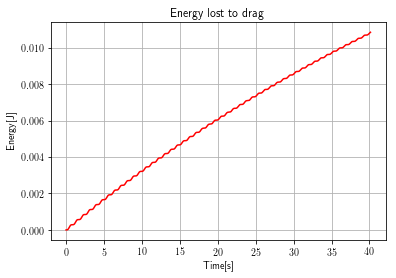

In [28]:
plt.title('Energy lost to drag')
plt.xlabel('Time[s]')
plt.ylabel('Energy[J]')
plt.plot(t, dragSolutionWithTurbulenceAndString[:, 2], 'r', label='E_drag')
plt.grid();


Energy is [0.03524732 0.03524731 0.03524731 ... 0.02439413 0.02439322 0.02439235]


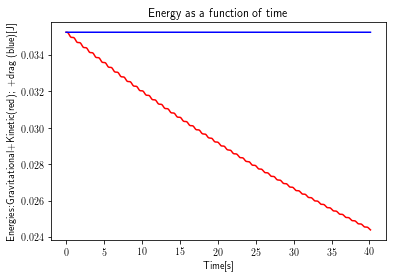

In [29]:
Energy=(0.5*mass*l**2)*dragSolutionWithTurbulenceAndString[:,1]**2-(mass*g*l)*(np.cos(dragSolutionWithTurbulenceAndString[:,0])-1)
fig=plt.figure()
plt.plot(t,Energy,'r')
plt.plot(t,Energy+dragSolutionWithTurbulenceAndString[:,2],'b')
plt.title('Energy as a function of time')
plt.xlabel('Time[s]')
plt.ylabel('Energies:Gravitational+Kinetic(red); +drag (blue)[J]')
print('Energy is', Energy)

In [30]:
np.save('dragSolutionWithTurbulenceAndString',dragSolutionWithTurbulenceAndString)
np.save('dragSolutionT',t)